In [4]:
import ast
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sentencepiece as spm
from IPython.display import clear_output
import math

def sigmoid(x):
      return 1 / (1 + math.exp(-x))

def metric(lang, size, model_type):
    
    size=size/1000
    
    f_m = open(f'./data/{lang}/tokenizers/{lang}_{model_type}_{size}k/{lang}_{model_type}_{size}k.freq').read()
    f_m = ast.literal_eval(f_m)
    
    i = 1
    
    weighted_m_val = 0
    
    m_95_len = int((len(f_m)/100)*95)

    for val in f_m.keys():
        
        weighted_m_val += int(f_m[val])*i
        
        if i > m_95_len:
            break
        
        i += 1
    
    weighted_m_val = weighted_m_val/sum(range(i))
    
    return weighted_m_val

def add_freq_to_df(lang, size, model_type, df):
    
    size=size/1000

    path = f'./data/{lang}/tokenizers/{lang}_{model_type}_{size}k/{lang}_{model_type}_{size}k.freq'
    f_m = open(path, 'r').read()
    f_m = ast.literal_eval(f_m)
    
    i = 1
    
    for val in f_m.keys():
        if 100<i<(size*1000):   
            df.loc[len(df)+1]=[model_type, i, int(f_m[val])]
        
        i += 1

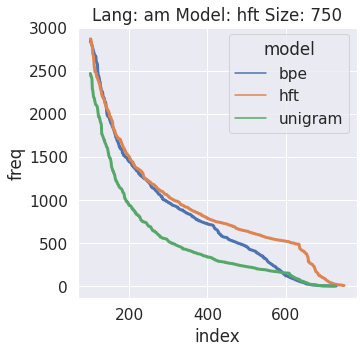

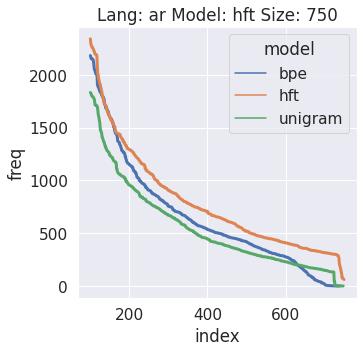

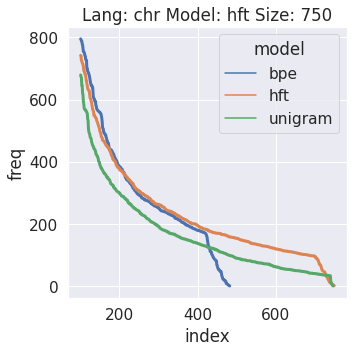

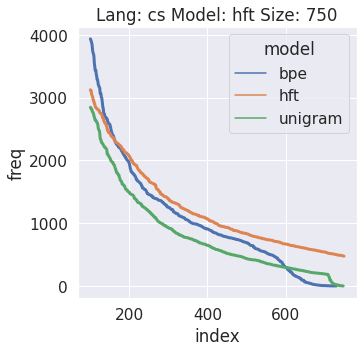

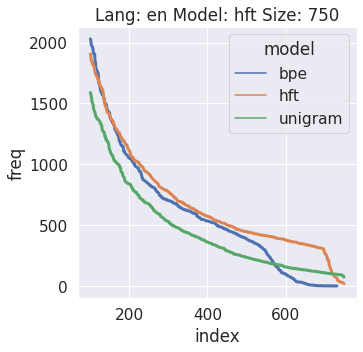

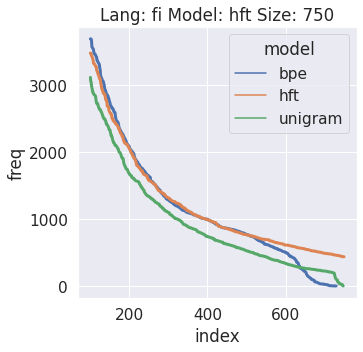

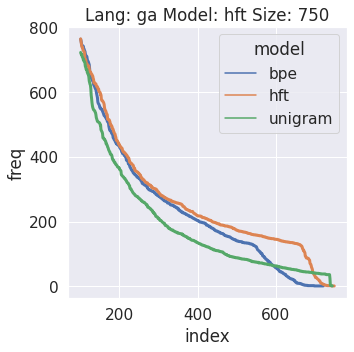

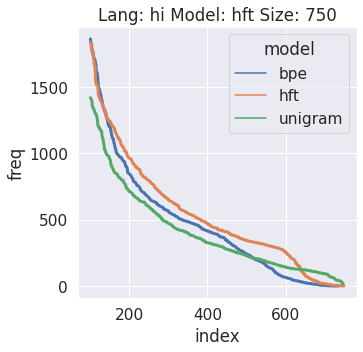

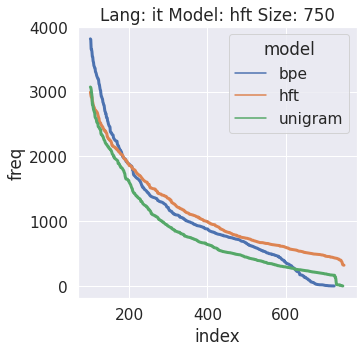

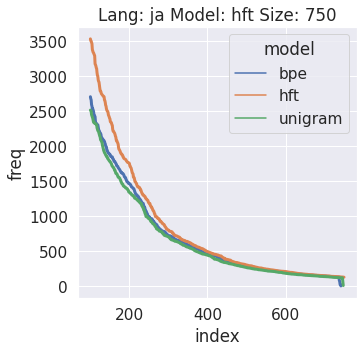

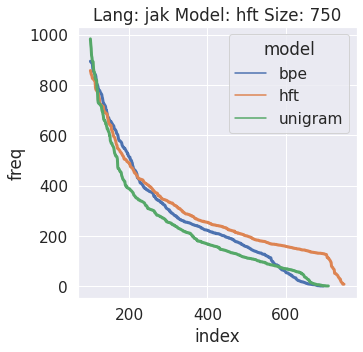

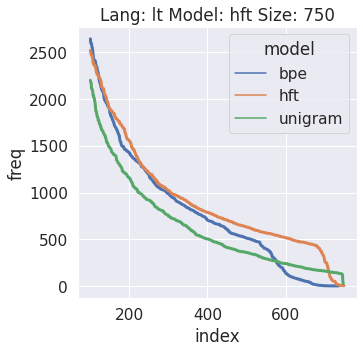

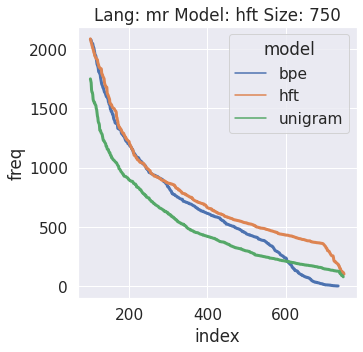

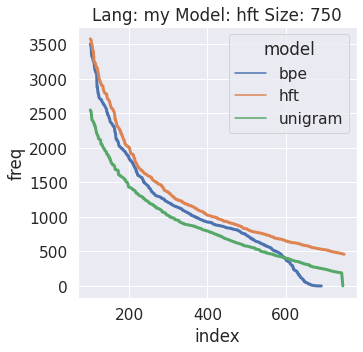

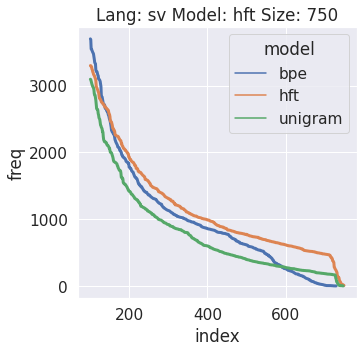

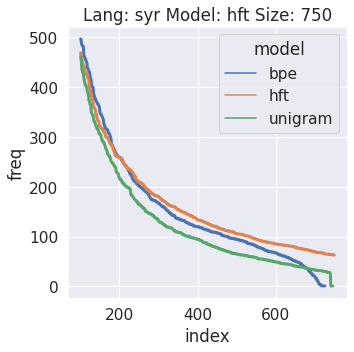

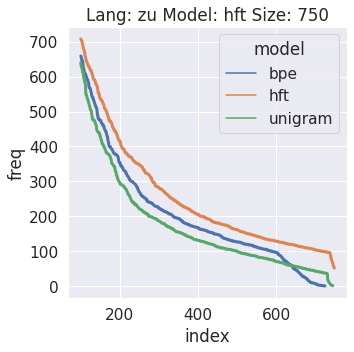

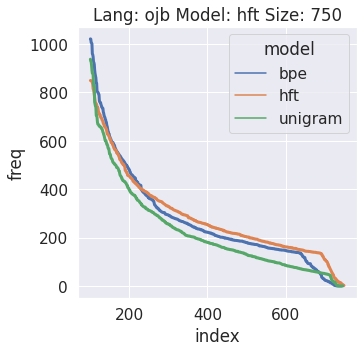

In [7]:
datasets = [
           'am',
           'ar', 
            'chr', 
           'cs', 
           'en',
            'fi', 
            'ga',
            'hi',
            'it',
           'ja',
           'jak',
           'lt',
            'mr',
            'my',
            'sv',
           'syr',
            'zu',
           'ojb'
            ]
sizes = [
        #500,
        750,
        #1500,
        #3000,
        #4000,
        #6000,
        #8000
       ] 
model_types = [
              'unigram',
              'bpe',
              'hft',
              ] 
sns.set(font_scale=1.4)

for lang in datasets:
    df = pd.DataFrame(columns=['model', 'index', 'freq'])
    for model_type in model_types:
        for size in sizes:
            add_freq_to_df(lang, size, model_type, df)
        with open('./values.tsv', 'a+') as out:
            print(f'{lang} {model_type} {metric(lang, size, model_type)}', file=out)
    
    df = df.sort_values(by="model", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
    plt.figure(figsize=(5,5))
    ax = sns.lineplot(data=df, x='index', y='freq', hue='model', linewidth=3)
    ax.set_title(f'Lang: {lang} Model: {model_type} Size: {size}')
    fig = ax.get_figure()
    fig.savefig(f'./plots/freqs_{lang}_{model_type}_{float(size/1000)}.png')
    plt.show()

In [78]:
data_path = './data'
src_lang = 'en'
tgt_lang = 'mr'
lang = 'en'

tokenizer = 'en_hft_0.5k'
model_type = 'hft'

tokenizer_path = f'./tokenizers/{src_lang}_{tgt_lang}/{lang}/{tokenizer}/{tokenizer}.vocab'
tokenized_path = f'{data_path}/{src_lang}_{tgt_lang}/train/tokenized/train_toks_{tokenizer}.{lang}'

toks = open(tokenized_path, 'r').readlines()

if model_type in ['bpe', 'unigram']:
    tokenizer_path = f'./tokenizers/{src_lang}_{tgt_lang}/{lang}/{tokenizer}/{tokenizer}.model'
    
    sp = spm.SentencePieceProcessor()
    sp.load(f'{tokenizer_path}')
    vocabs = [sp.id_to_piece(id) for id in range(sp.get_piece_size())]
    
    print('no hft', len(vocabs))

else:

    vocab = open(tokenizer_path, 'r').readlines()
    vocabs = []

    for line in vocab:

        line=line.split("\t")

        vocabs.append(line[0])
        
    print('hft', len(vocabs))
    
freqs = {}

for line in toks:
    if model_type in ['bpe', 'unigram']:
        line = ast.literal_eval(line)
    else:
        line = line.split(' ')
    for tok in line:
        if tok in vocabs:
            if tok in freqs.keys():
                freqs[tok] += 1
            else:
                freqs[tok] = 1

print(len(freqs))
print(tokenizer_path)
print(tokenized_path)

freqs = dict(sorted(freqs.items(), key=lambda item: item[1], reverse=True))
with open(f'./tokenizers/{src_lang}_{tgt_lang}/{lang}/{tokenizer}/{tokenizer}.freqtest', 'w+') as out:
    print(freqs, file=out)

print(f"Made freqs for {tokenizer}")

hft 546
546
./tokenizers/en_mr/en/en_hft_0.5k/en_hft_0.5k.vocab
./data/en_mr/train/tokenized/train_toks_en_hft_0.5k.en
Made freqs for en_hft_0.5k


1657968633.2600722


<AxesSubplot:xlabel='index', ylabel='freq'>

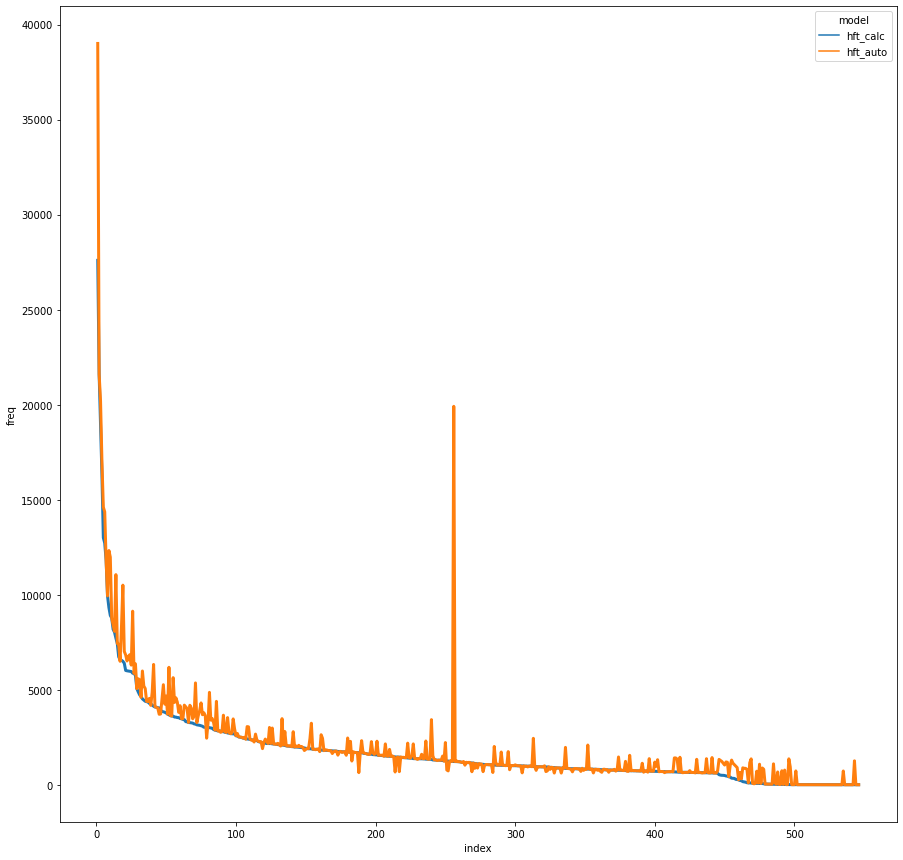

In [58]:
data_path = './data'
src_lang = 'en'
tgt_lang = 'mr'
lang = 'en'

tokenizer1 = 'en_hft_0.5k'
tokenizer2 = 'en_bpe_0.5k'

df = pd.DataFrame(columns=['model', 'index', 'freq'])

freqs_path = f'./tokenizers/{src_lang}_{tgt_lang}/{lang}/{tokenizer}/{tokenizer1}.freqtest'
vocab_path = f'./tokenizers/{src_lang}_{tgt_lang}/{lang}/{tokenizer}/{tokenizer2}.freq'
print(os.path.getmtime(vocab_path))

freq_test1 = open(freqs_path, 'r').read()
freq_test1 = ast.literal_eval(freq_test1)

freq_test2 = open(_path, 'r').read()
freq_test2 = ast.literal_eval(freq_test2)


vocab = open(vocab_path, 'r').readlines()
vocabs = {}

for line in vocab:
    line = line.split('\t')
    vocabs[line[0]] = line[1].strip('\n')

i = 1

for val in freq_test.keys():   
    if i > 0 and val in vocabs.keys(): 
        #print(val)
        df.loc[len(df)+1]=['hft_calc', i, int(freq_test[val])]
        df.loc[len(df)+1]=['hft_auto', i, int(vocabs[val])]

    i += 1

plt.figure(figsize=(15,15))
sns.lineplot(data=df, x='index', y='freq', hue='model', linewidth=3)

In [88]:
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print(i, flush=True)






9
